In [1]:
import requests
from datetime import datetime
import datetime
import pandas as pd
from textblob import TextBlob
import sqlite3
import praw

In [2]:
from credentials import credentials

In [3]:
client_id, client_secret,password, user_agent, username = credentials

In [4]:
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    password=password,
    user_agent=user_agent,
    username=username,
)

In [5]:
print(reddit.user.me())

JustAnotherCogg


In [6]:
print(reddit.read_only)

False


In [7]:
top_posts = reddit.subreddit('worldnews').top(time_filter='day',limit=30)
i = 1

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
sql = ('Select * from top30')
z = pd.read_sql_query(sql,connection)

for post in top_posts:
    atbilde =[]
    atbilde.append(str(datetime.datetime.now()))
    atbilde.append(str(i))
    for j in z.columns[2:]:
        try:
            atbilde.append(str(eval("post."+j)))
        except:
            atbilde.append("")

    for m in vars(post):
        if m not in z.columns[2:]:
            print(m)
    
    connection = sqlite3.connect('MSC.db')
    cursor = connection.cursor()
    sql2 = ("insert INTO top30('moment', 'daily_rank', 'comment_limit', 'comment_sort', '_reddit', 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'url_overridden_by_dest', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video', '_fetched', '_comments_by_id', 'author_cakeday', 'flair', 'link_flair_template_id', 'num_duplicates', 'post_hint', 'preview', 'thumbnail_height', 'thumbnail_width','_comments') VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)")
    cursor.execute(sql2, atbilde)          
    connection.commit()
    connection.close()
    
    i +=1

crosspost_parent_list
crosspost_parent


In [8]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()

sql = ("Select * from top30 where moment>date('now')")
z = pd.read_sql_query(sql,connection)

In [11]:
for l, m in(zip(z.daily_rank ,z.title)):
    print(l, m[:50])

1 Praise for Scotland as renewables meet 97 per cent
2 Taiwan reports largest ever incursion by Chinese a
3 Landmark brain cancer vaccine passes first phase o
4 Kremlin says it won't respond to call from wife of
5 Louvre museum makes its entire collection availabl
6 US, Taiwan sign coast guard deal to Counter China
7 Mexico closes Yucatan tourist site due to surge of
8 The stranded Ever Given mega-container ship in the
9 Xinjiang cotton: Western clothes brands vanish as 
10 Coal company Teck fined $60M for contaminating B.C
11 Trains collide in southern Egypt, killing at least
12 A U.N. humanitarian official warned Thursday of an
13 France submits the baguette as candidate for UNESC
14 France launches 2-year experiment with medical mar
15 Australia's ambassador to China says Beijing's tra
16 The first ever “red list” assessment of the Africa
17 Warren Buffett's favorite market gauge surges to r
18 U.S. accuses China of 'state-led' social media cam
19 US Navy to send expert team to assi

In [ ]:
import shutil
newPath = shutil.copy('MSC.db', '/Users/Edite/Documents/GitHub/MscAston/MSC')

In [ ]:
# For fuckups

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
cursor.executescript("delete from top30 where moment == '20/03/2021  20:00:00'")
#z = pd.read_sql_query(sql,connection)

In [ ]:
df.to_sql('top30', connection, if_exists='append',index=False)

In [12]:
from datetime import datetime
print(datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'))

2021-03-26 17:13:33


In [13]:
print(datetime.datetime.utcnow().strftime("%s"))

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
a = '2021-03-19 18:03:35'

In [ ]:
b = '2021-03-20 20:00:00'

# For back engineering
## Add for loop for 1-9 March

top_posts = reddit.subreddit('worldnews').top(time_filter='week',limit=300)
i = 1

connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
sql = ('Select * from top30')
z = pd.read_sql_query(sql,connection)
atbilde =[]
for post in top_posts:
    
    if str(eval("post.created_utc")) > datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S').strftime("%s") and str(eval("post.created_utc")) < datetime.datetime.strptime(b, '%Y-%m-%d %H:%M:%S').strftime("%s") and i <31:
        atbilde =[]
        atbilde.append('20/03/2021  20:00:00')
        atbilde.append(str(i))
        for j in z.columns[2:]:
            try:
                atbilde.append(str(eval("post."+j)))
            except:
                atbilde.append("")

        for m in vars(post):
            if m not in z.columns[2:]:
                print(m)

        connection = sqlite3.connect('MSC.db')
        cursor = connection.cursor()
        sql2 = ("insert INTO top30('moment', 'daily_rank', 'comment_limit', 'comment_sort', '_reddit', 'approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'url_overridden_by_dest', 'view_count', 'archived', 'no_follow', 'is_crosspostable', 'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only', 'can_gild', 'spoiler', 'locked', 'author_flair_text', 'treatment_tags', 'visited', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'author', 'discussion_type', 'num_comments', 'send_replies', 'whitelist_status', 'contest_mode', 'mod_reports', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'stickied', 'url', 'subreddit_subscribers', 'created_utc', 'num_crossposts', 'media', 'is_video', '_fetched', '_comments_by_id', 'author_cakeday', 'flair', 'link_flair_template_id', 'num_duplicates', 'post_hint', 'preview', 'thumbnail_height', 'thumbnail_width','_comments') VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)")
        cursor.execute(sql2, atbilde)          
        connection.commit()
        connection.close()

        i +=1

In [14]:
z

,moment,daily_rank,comment_limit,comment_sort,_reddit,approved_at_utc,subreddit,selftext,author_fullname,saved,...,_comments_by_id,_comments,author_cakeday,flair,link_flair_template_id,num_duplicates,post_hint,preview,thumbnail_height,thumbnail_width
0,2021-03-27 09:52:14.683680,1,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_126z0p,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,7,link,{'images': [{'source': {'url': 'https://extern...,93
1,2021-03-27 09:52:18.484925,2,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_5smnkfcp,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,9,link,{'images': [{'source': {'url': 'https://extern...,73
2,2021-03-27 09:52:23.032934,3,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_gg5le,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,15,link,{'images': [{'source': {'url': 'https://extern...,73
3,2021-03-27 09:52:28.547856,4,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_15u10x,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,2,link,{'images': [{'source': {'url': 'https://extern...,94
4,2021-03-27 09:52:32.035189,5,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_3a3iu,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,4,link,{'images': [{'source': {'url': 'https://extern...,140
5,2021-03-27 09:52:33.320223,6,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_1it9obt7,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,1,link,{'images': [{'source': {'url': 'https://extern...,99
6,2021-03-27 09:52:36.731118,7,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_dfo2l,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,1,link,{'images': [{'source': {'url': 'https://extern...,98
7,2021-03-27 09:52:37.703392,8,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_5qlsa,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,3,link,{'images': [{'source': {'url': 'https://extern...,78
8,2021-03-27 09:52:40.919311,9,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_sjx31,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,9,link,{'images': [{'source': {'url': 'https://extern...,78
9,2021-03-27 09:52:44.222552,10,2048,confidence,<praw.reddit.Reddit object at 0x7f849dd718d0>,None,worldnews,,t2_14i4je,False,...,{},140,,,<praw.models.reddit.submission.SubmissionFlair...,,7,link,{'images': [{'source': {'url': 'https://extern...,78


In [15]:
for i in z.columns:
    print(i)

moment
daily_rank
comment_limit
comment_sort
_reddit
approved_at_utc
subreddit
selftext
author_fullname
saved
mod_reason_title
gilded
clicked
title
link_flair_richtext
subreddit_name_prefixed
hidden
pwls
link_flair_css_class
downs
top_awarded_type
hide_score
name
quarantine
link_flair_text_color
upvote_ratio
author_flair_background_color
subreddit_type
ups
total_awards_received
media_embed
author_flair_template_id
is_original_content
user_reports
secure_media
is_reddit_media_domain
is_meta
category
secure_media_embed
link_flair_text
can_mod_post
score
approved_by
author_premium
thumbnail
edited
author_flair_css_class
author_flair_richtext
gildings
content_categories
is_self
mod_note
created
link_flair_type
wls
removed_by_category
banned_by
author_flair_type
domain
allow_live_comments
selftext_html
likes
suggested_sort
banned_at_utc
url_overridden_by_dest
view_count
archived
no_follow
is_crosspostable
pinned
over_18
all_awardings
awarders
media_only
can_gild
spoiler
locked
author_flair_

In [17]:
z.num_crossposts

0     4
1     5
2     3
3     0
4     2
5     0
6     1
7     0
8     0
9     2
10    0
11    2
12    1
13    0
14    0
15    0
16    2
17    1
18    0
19    1
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    1
29    0
Name: num_crossposts, dtype: int64

In [29]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()

sql = ("Select * from top30")
z = pd.read_sql_query(sql,connection)

In [21]:
z.title.value_counts()

U.S. and allies set to announce coordinated sanctions on China over Uyghurs 'genocide'                                                                                                                                                           2
Pfizer/BioNTech COVID-19 vaccine neutralizes Brazil variant in lab study                                                                                                                                                                         2
As the Chinese embassy in London prepares to move into its new location, councilors voted to consider naming roads and buildings in the surrounding area of the site Tiananmen Square, Uyghur Court, Hong Kong Road, and Tibet Hill.             2
Norway blocks Rolls-Royce's plan to sell engine maker to Russia                                                                                                                                                                                  2
Myanmar Regime Troops Shoot 

In [30]:
z.moment.value_counts()

20/03/2021 20:00:00           30
2021-03-25 08:17:15.940766     1
2021-03-22 21:42:17.912567     1
2021-03-26 10:34:40.182695     1
2021-03-14 23:50:26.052738     1
                              ..
2021-03-26 10:35:13.171130     1
2021-03-16 21:19:06.311476     1
2021-03-19 19:04:55.859967     1
2021-03-21 21:33:21.895343     1
2021-03-13 20:50:40.774811     1
Name: moment, Length: 541, dtype: int64

In [ ]:
'20/03/2021  20:00:00'

In [ ]:
UPDATE table_name SET column1 = value1, column2 = value2...., columnN = valueN WHERE [condition];

In [38]:
connection = sqlite3.connect('MSC.db')
cursor = connection.cursor()
sql2 = ("UPDATE top30 SET moment = '20/03/2021 20:00:00.554220' where moment = '20/03/2021 20:00:00'")
cursor.execute(sql2)
connection.commit()
print("Record Updated successfully ")
cursor.close()


Record Updated successfully 


In [33]:
pd.to_datetime(z.moment).describe()

/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                            570
unique                           541
top              2021-03-20 20:00:00
freq                              30
first     2021-03-09 20:06:38.554220
last      2021-03-27 09:53:02.572003
Name: moment, dtype: object

<AxesSubplot:>

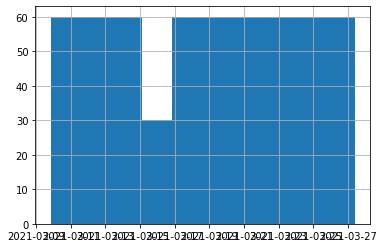

In [37]:
pd.to_datetime(z.moment).hist()

In [36]:
%matplotlib inline